# Settup

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes.labelsize'] = 20

# MIMO Channels

In [2]:
from symbols import SymbolGenerator, MLdecoder
from channels import KroneckerRayleighChannelMIMO, calculateBERfast
from receivers import MMRC

In [3]:
import numpy as np

snr = np.array(range(-10,10))

In [4]:
Rt = np.array([[1]])
Rr = np.array([[1,0],[0,1]])

#set the random number generator to get the same 'random' channel
ch_unc = KroneckerRayleighChannelMIMO(1,2,Rt,Rr,seed=42)

Rr = np.array([[1,0.1],[0.1,1]])
ch_cor01 = KroneckerRayleighChannelMIMO(1,2,Rt,Rr,seed=42)

Rr = np.array([[1,0.3],[0.3,1]])
ch_cor03 = KroneckerRayleighChannelMIMO(1,2,Rt,Rr, seed=42)

In [5]:
generator = SymbolGenerator(symbols = 'QPSK')
decoder = MLdecoder('QPSK')

mmrc_unc = MMRC(2,ch_unc)
mmrc_cor01 = MMRC(2,ch_cor01)
mmrc_cor03 = MMRC(2,ch_cor03)

In [6]:
y_unc = calculateBERfast(ch_unc, mmrc_unc, decoder, generator,snr,Nsymbols=10000, iterations = 10, verbose=False)
y_cor01 = calculateBERfast(ch_cor01, mmrc_cor01, decoder, generator,snr,Nsymbols=10000, iterations = 10, verbose=False)
y_cor03 = calculateBERfast(ch_cor03, mmrc_cor03, decoder, generator,snr,Nsymbols=10000, iterations = 10, verbose=False)

20  threads will be created
No information will be given about the current state of the process, this may take a long time.Set verbose to true for logging
20  threads will be created
No information will be given about the current state of the process, this may take a long time.Set verbose to true for logging
20  threads will be created
No information will be given about the current state of the process, this may take a long time.Set verbose to true for logging


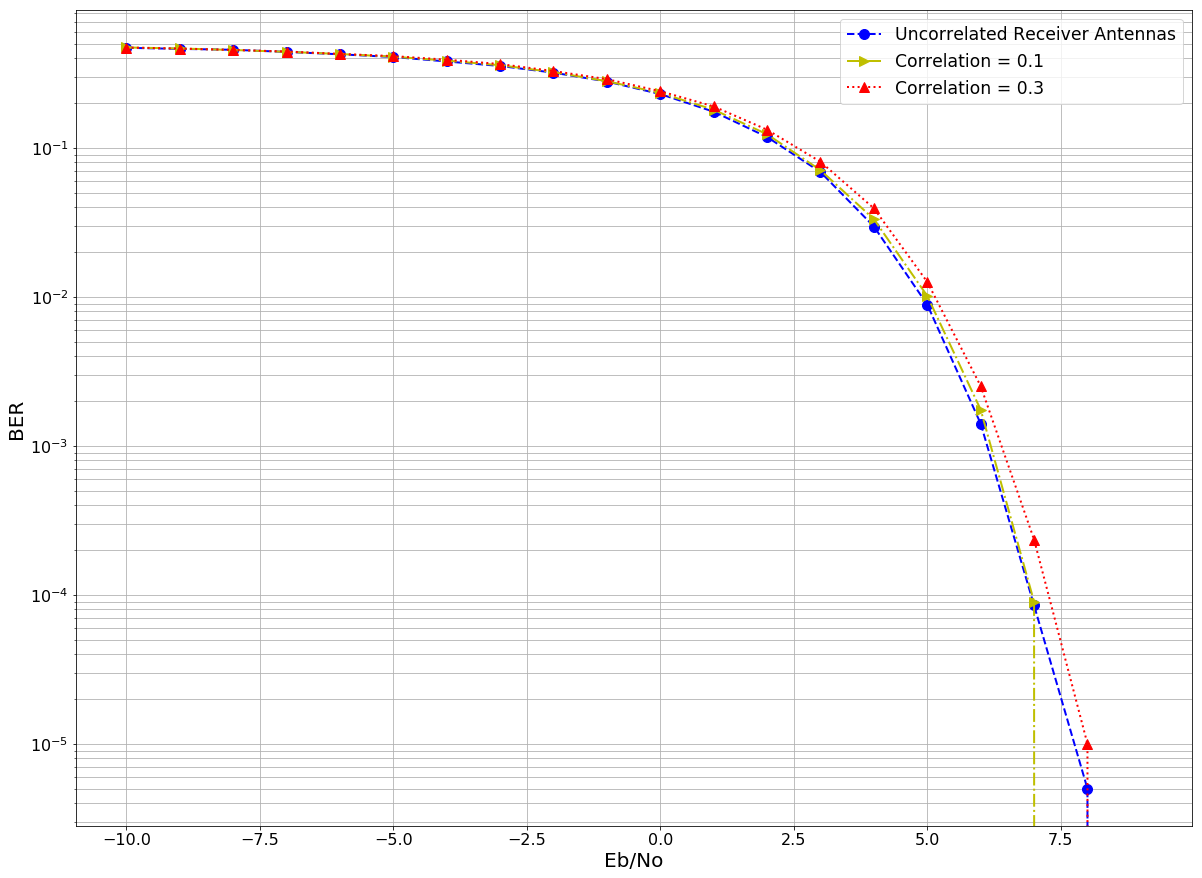

In [7]:
plt.figure(figsize=(20,15))

single = plt.semilogy(snr,y_unc,linestyle='--',marker='o', color='b', label='Uncorrelated Receiver Antennas')
double = plt.semilogy(snr,y_cor01, linestyle='-.',marker='>', color='y', label='Correlation = 0.1')
quintuple = plt.semilogy(snr,y_cor03,linestyle=':',marker='^', color='r', label = 'Correlation = 0.3')
plt.ylabel('BER')
plt.xlabel('Eb/No')
plt.legend(fontsize='xx-large')
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

In [8]:
Rt = np.array([[1]])
Rr1 = np.identity(1)
Rr3 = np.identity(3)
Rr5 = np.identity(5)

ch1 = KroneckerRayleighChannelMIMO(1,1,Rt,Rr1)
ch3 = KroneckerRayleighChannelMIMO(1,3,Rt,Rr3)
ch5 = KroneckerRayleighChannelMIMO(1,5,Rt,Rr5)


mmrc1 = MMRC(1,ch1)
mmrc3 = MMRC(3,ch3)
mmrc5 = MMRC(5,ch5)


y1 = calculateBERfast(ch1, mmrc1, decoder, generator,snr,Nsymbols=10000, iterations = 10, verbose=False)
y3 = calculateBERfast(ch3, mmrc3, decoder, generator,snr,Nsymbols=10000, iterations = 10, verbose=False)
y5 = calculateBERfast(ch5, mmrc5, decoder, generator,snr,Nsymbols=10000, iterations = 10, verbose=False)

20  threads will be created
No information will be given about the current state of the process, this may take a long time.Set verbose to true for logging
20  threads will be created
No information will be given about the current state of the process, this may take a long time.Set verbose to true for logging
20  threads will be created
No information will be given about the current state of the process, this may take a long time.Set verbose to true for logging


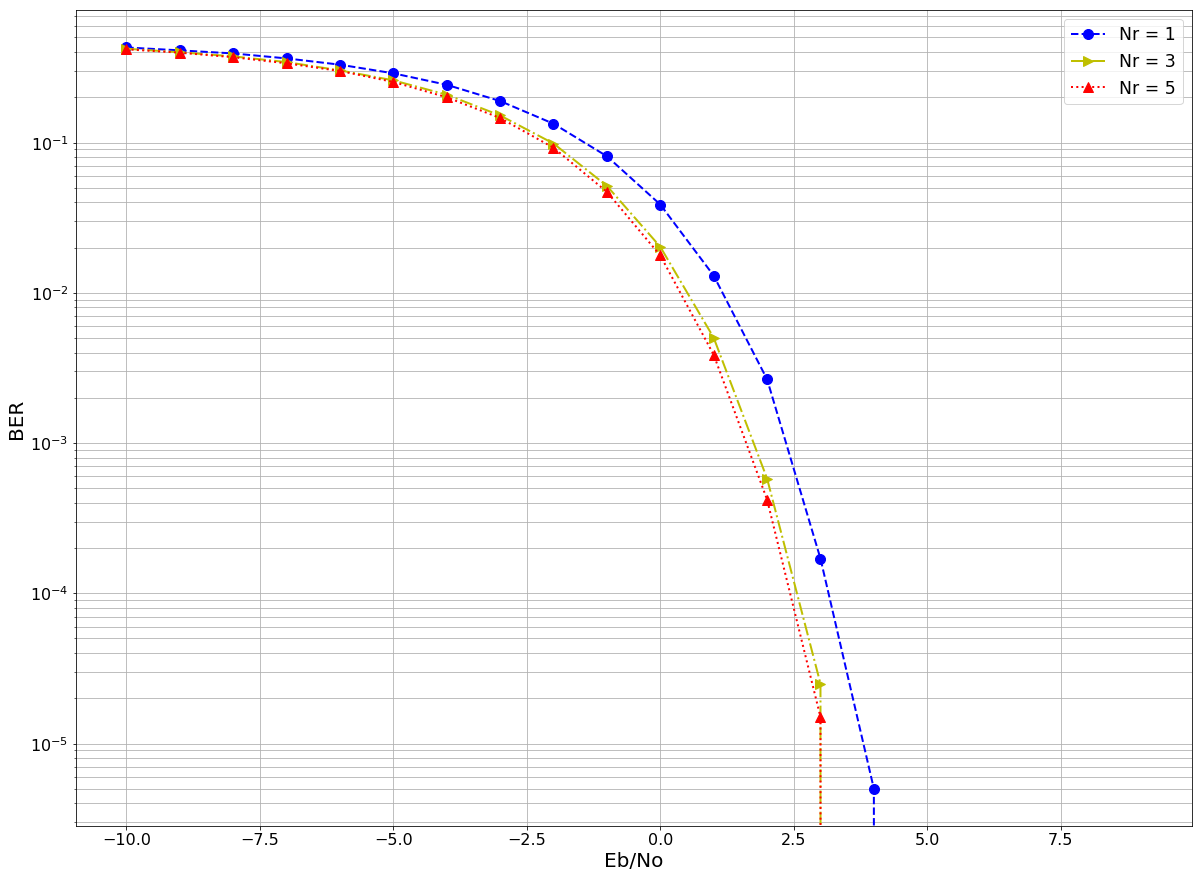

In [9]:
plt.figure(figsize=(20,15))

single = plt.semilogy(snr,y1,linestyle='--',marker='o', color='b', label='Nr = 1')
double = plt.semilogy(snr,y3, linestyle='-.',marker='>', color='y', label='Nr = 3')
quintuple = plt.semilogy(snr,y5,linestyle=':',marker='^', color='r', label = 'Nr = 5')
plt.ylabel('BER')
plt.xlabel('Eb/No')
plt.legend(fontsize='xx-large')
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

## Alamouti Coding

# Data Driven Antenna Slection